# Pedestrian Detection using Mask R-CNN
### Pre-processing Images from INRIA Person Dataset

In [144]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndimage
import matplotlib.image as mpimg 
import os
from imageio import imread
import matplotlib.pyplot as plt

from utils.raw_data import *

In [145]:
data_root = "../Datasets"
annotation_path = os.path.join(data_root, 'GRAZ02/Annotations')
train_img_path = os.path.join(data_root, 'GRAZ02/Training_Data')

classes = ['bike', 'carsgraz', 'person']

In [146]:
rw_tr_data = RawTrainingData(train_img_path, annotation_path, classes)
rw_tr_data.load_data()

Loaded 50 images out of 900...
Loaded 100 images out of 900...
Loaded 150 images out of 900...
Loaded 200 images out of 900...
Loaded 250 images out of 900...
Loaded 300 images out of 900...
Loaded 350 images out of 900...
Loaded 400 images out of 900...
Loaded 450 images out of 900...
Loaded 500 images out of 900...
Loaded 550 images out of 900...
Loaded 600 images out of 900...
Loaded 650 images out of 900...
Loaded 700 images out of 900...
Loaded 750 images out of 900...
Loaded 800 images out of 900...
Loaded 850 images out of 900...
Loaded 900 images out of 900...


/home/advait/.local/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


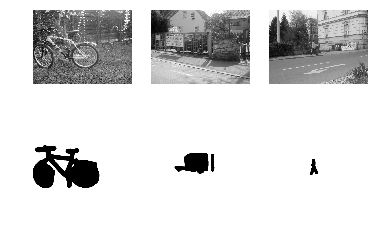

In [147]:
# Visualize Loaded Data
for i in range(3):
    plt.subplot(2, 3, i + 1)
    img = rw_tr_data.X[300*i + 1]
    plt.imshow(img.astype('uint8'), 'gray')
    plt.axis('off')

    plt.subplot(2, 3, 3+(i+1))
    img = rw_tr_data.X_mask[300*i + 1]
    plt.imshow(img.astype('uint8'), 'gray')
    plt.axis('off')
    
    plt.subplot(2, 3, 3+(i+1))
    img = rw_tr_data.X_mask[300*i + 1]
    plt.imshow(img.astype('uint8'), 'gray')
    plt.axis('off')
    

In [148]:
def test_Transform():
    img = rw_tr_data.X[800]
    ann = rw_tr_data.X_mask[800]
    tr = PreProcTransforms();
    img1, _ = tr.change_bg(img=img, ann=ann, delta=50)
    plt.imshow(img, 'gray')
    plt.show()
    plt.imshow(img1, 'gray')
    plt.show()

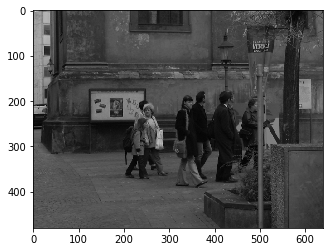

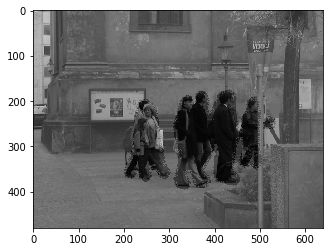

In [149]:
test_Transform()